In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
mnist=tf.keras.datasets.mnist
#same we can do with following datasets:
#mnist=tf.keras.datasets.fashion_mnist
#mnist=tf.keras.datasets.cifar10
#mnist=tf.keras.datasets.cifar100

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
len(x_train), len(x_test)

(60000, 10000)

In [46]:
len(y_train), len(y_test)

(60000, 10000)

In [11]:
x_train[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[4]

9

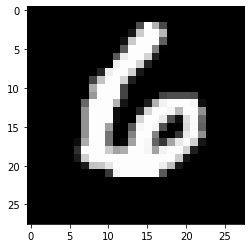

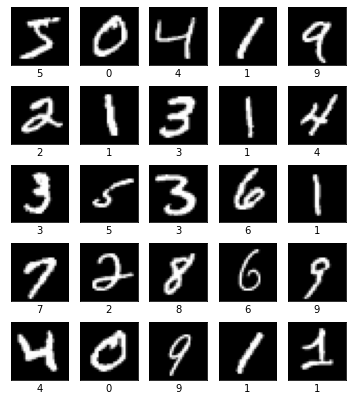

In [23]:
plt.figure(figsize=(6,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])
  plt.imshow(x_train[i],cmap='gray')
  

In [25]:
x_train.shape


(60000, 28, 28)

In [0]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)


Create the model

In [0]:
model=tf.keras.models.Sequential()

Adding the layers

In [0]:
model.add(tf.keras.layers.Flatten())#input
model.add(tf.keras.layers.Dense(784,activation='relu'))#hidden
model.add(tf.keras.layers.Dense(600,activation='relu'))#hidden
model.add(tf.keras.layers.Dense(64,activation='relu'))#hidden
model.add(tf.keras.layers.Dense(10,activation='softmax'))#output


Compile the model

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Train the model

In [32]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2373 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0751 - accuracy: 0.9763
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0587 - accuracy: 0.9810


In [0]:
predictions=model.predict(x_test)

In [36]:
y_test[100]

6

In [38]:
np.argmax(predictions[100])

6

In [0]:
y_test[120]

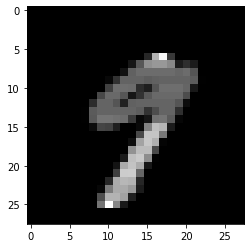

In [41]:
plt.imshow(x_test[20],cmap='gray')

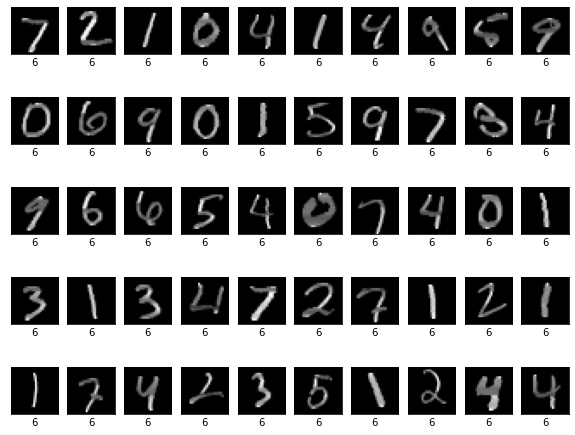

In [44]:
plt.figure(figsize=(10,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[100]))
  plt.imshow(x_test[i],cmap='gray')
  

In [45]:
loss,accu=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9773


For real image

746496


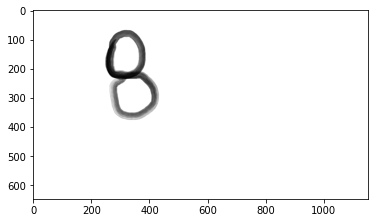

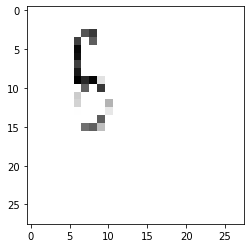

Probability Distribution for 0 0.00021452365
Probability Distribution for 1 1.2093776e-06
Probability Distribution for 2 6.454477e-08
Probability Distribution for 3 4.53059e-08
Probability Distribution for 4 1.4953608e-05
Probability Distribution for 5 0.002574829
Probability Distribution for 6 0.9971921
Probability Distribution for 7 6.2825954e-08
Probability Distribution for 8 2.1697188e-06
Probability Distribution for 9 6.960064e-08
The Predicted Value is 6


In [48]:
from PIL import Image
import cv2
user_test = "/content/8.png"
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("8_new.png")
bw
img_array = cv2.imread("/content/8.png", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))